In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

import sklearn
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings # supress warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.inspection import DecisionBoundaryDisplay

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Data Preprocessing

In [99]:
# read csv file into dataframe

df = pd.read_csv('Spotify_Youtube.csv')

# print top rows
df.head()

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [100]:
# null values in dataset
df.isnull().sum()

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64

In [101]:
# dropping null values and fixing song titles
# df = df[~df['Track'].str.contains(r'[^A-Za-z0-9\s\(\)]', na=False)]

# Drop irrelavant variables:
url_cols = ['Unnamed: 0', 'Artist', 'Url_spotify','Album',
            'Album_type', 'Uri', 'Url_youtube','Channel', 'Title','Description']

df.drop(url_cols, axis=1, inplace=True)

df.dropna(inplace=True)

# dropping all songs with unlicensed videos
df = df[df['Licensed'] == True]

# print top rows
df.head()

,Track,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream
0,Feel Good Inc.,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09
1,Rhinestone Eyes,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08
2,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07
3,On Melancholy Hill,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08
4,Clint Eastwood,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08


In [102]:
# Number of rows
print("Number of rows:",len(df))
# Number of columns
print("Number of variables:", len(df.columns))

df.describe()

Number of rows: 13727
Number of variables: 18


,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,13727.000000,1.372700e+04,1.372700e+04,1.372700e+04,1.372700e+04,1.372700e+04
mean,0.621729,0.646940,5.293655,-7.324306,0.090877,0.275269,0.048436,0.191123,0.530935,120.786285,2.271044e+05,1.228023e+08,8.475860e+05,3.570190e+04,1.539268e+08
std,0.163739,0.208015,3.573170,4.384036,0.098381,0.279235,0.180667,0.166319,0.242041,29.593943,1.406430e+05,3.165125e+08,2.048840e+06,2.274289e+05,2.680618e+08
min,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,4.100000e+01,0.000000e+00,0.000000e+00,6.574000e+03
25%,0.521000,0.525000,2.000000,-8.385500,0.035500,0.040100,0.000000,0.093500,0.344000,97.076000,1.829935e+05,4.719719e+06,5.073350e+04,1.172000e+03,1.964934e+07
50%,0.639000,0.676000,5.000000,-6.292000,0.050300,0.176000,0.000002,0.124000,0.538000,119.982000,2.151110e+05,2.600092e+07,2.042060e+05,5.434000e+03,5.568759e+07
75%,0.741000,0.804000,8.000000,-4.813000,0.098000,0.445000,0.000307,0.233000,0.722000,139.952000,2.528465e+05,1.010764e+08,7.231595e+05,2.030800e+04,1.574344e+08
max,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,0.997000,0.991000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


Views min:  41.0
Views max:  8079649362.0
Views median:  26000918.0
Views mean:  122802336.68849713


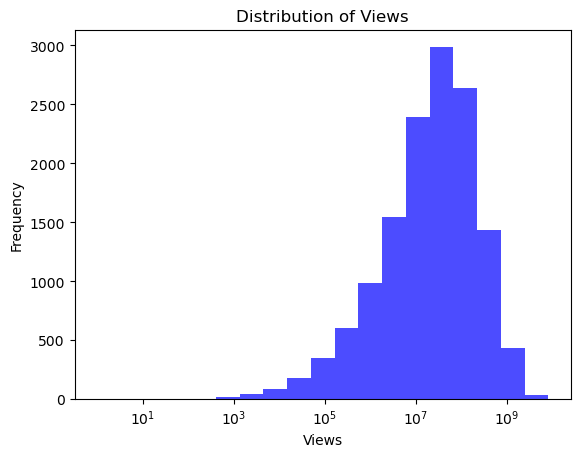

In [103]:
#distribution of views, logarithmic x scale

plt.hist(df["Views"], bins=np.logspace(np.log10(1), np.log10(df["Views"].max()), 20), color='blue', alpha=0.7)
plt.title('Distribution of Views')
plt.xlabel('Views')
plt.ylabel('Frequency')
plt.xscale('log')

views_min = df["Views"].min()
views_max = df["Views"].max()
views_median = df["Views"].median()
views_mean = df["Views"].mean()

print("Views min: ", views_min)
print("Views max: ", views_max)
print("Views median: ", views_median)
print("Views mean: ", views_mean)

Stream min:  6574.0
Stream max:  3386520288.0
Stream median:  55687588.0


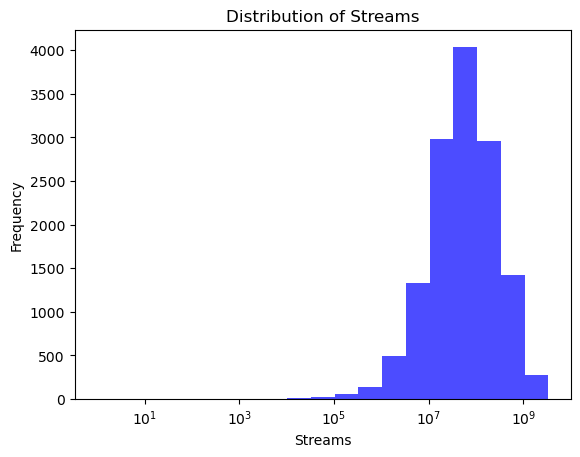

In [104]:
# distribution of streams, logarithmic x scale

plt.hist(df["Stream"], bins=np.logspace(np.log10(1), np.log10(df["Stream"].max()), 20), color='blue', alpha=0.7)
plt.title('Distribution of Streams')
plt.xlabel('Streams')
plt.ylabel('Frequency')
plt.xscale('log')

stream_min = df["Stream"].min()
stream_max = df["Stream"].max()
stream_median = df["Stream"].median()

print("Stream min: ", stream_min)
print("Stream max: ", stream_max)
print("Stream median: ", stream_median)

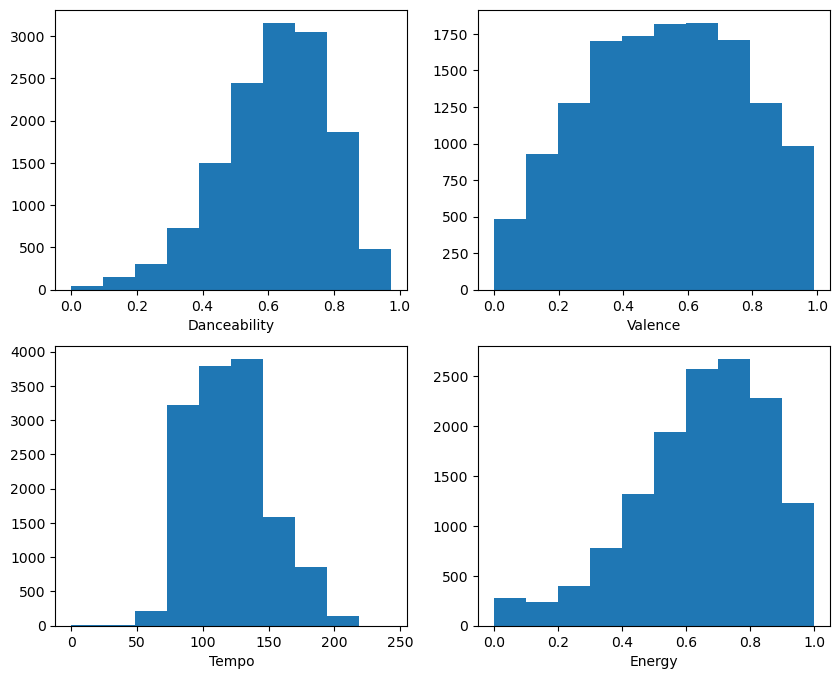

In [105]:
# histogram of four spotify API features 

# four subplots
fig, ((ax, bx), (cx, dx)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

#first feature: 'Danceability'
x_index = 0
ax.hist(df["Danceability"])
ax.set_xlabel('Danceability')

# second feature: 'Valence'
x_index = 0
bx.hist(df['Valence'])
bx.set_xlabel('Valence')

# third feature: 'Tempo'
x_index = 0
cx.hist(df['Tempo'])
cx.set_xlabel('Tempo')

# fourth feature: 'Energy'
x_index = 0
dx.hist(df['Energy'])
dx.set_xlabel('Energy')

plt.show()

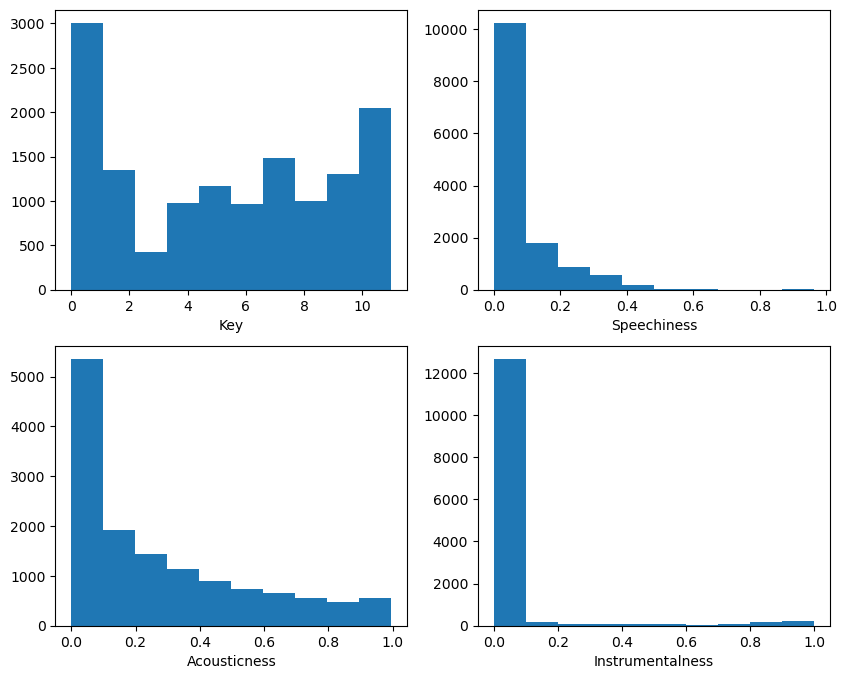

In [106]:
# histogram of four more spotify API features 

# four subplots
fig, ((ex, fx), (hx, gx)) = plt.subplots(nrows=2, ncols=2, figsize=(10,8))

#first feature: 'Danceability'
x_index = 0
ex.hist(df["Key"])
ex.set_xlabel('Key')

# second feature: 'Valence'
x_index = 0
fx.hist(df['Speechiness'])
fx.set_xlabel('Speechiness')

# third feature: 'Tempo'
x_index = 0
hx.hist(df['Acousticness'])
hx.set_xlabel('Acousticness')

# fourth feature: 'Energy'
x_index = 0
gx.hist(df['Instrumentalness'])
gx.set_xlabel('Instrumentalness')

plt.show()

#### Create a variable to classify hit songs 

A song is considered as a hit when it's in top 10% of view and streams variables. Otherwise, it is not a hit.  

In [107]:
# Calculate the 90th percentile (top 15%) for Views and Streams 
views_threshold = df["Views"].quantile(0.80)
streams_threshold = df["Stream"].quantile(0.80)

# Initialize the 'Hit' column with zeros
df["Hit"] = 0

# Loop through each row to determine if the song is a hit
for index, row in df.iterrows():
    # the hit song is in the top 10% for both Views and Streams
    if row["Views"] >= views_threshold and row['Stream'] >= streams_threshold:
        df.at[index, "Hit"] = 1 # Set to 1 for hits
    else:
        df.at[index, "Hit"] = 0  # Set to 0 otherwise

# Display the first few rows to verify the 'Hit' column
df.head()

,Track,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video,Stream,Hit
0,Feel Good Inc.,0.818,0.705,6.0,-6.679,0.1770,0.008360,0.002330,0.6130,0.772,138.559,222640.0,693555221.0,6220896.0,169907.0,True,True,1.040235e+09,1
1,Rhinestone Eyes,0.676,0.703,8.0,-5.815,0.0302,0.086900,0.000687,0.0463,0.852,92.761,200173.0,72011645.0,1079128.0,31003.0,True,True,3.100837e+08,0
2,New Gold (feat. Tame Impala and Bootie Brown),0.695,0.923,1.0,-3.930,0.0522,0.042500,0.046900,0.1160,0.551,108.014,215150.0,8435055.0,282142.0,7399.0,True,True,6.306347e+07,0
3,On Melancholy Hill,0.689,0.739,2.0,-5.810,0.0260,0.000015,0.509000,0.0640,0.578,120.423,233867.0,211754952.0,1788577.0,55229.0,True,True,4.346636e+08,1
4,Clint Eastwood,0.663,0.694,10.0,-8.627,0.1710,0.025300,0.000000,0.0698,0.525,167.953,340920.0,618480958.0,6197318.0,155930.0,True,True,6.172597e+08,1


Hit
0    12050
1     1677
Name: count, dtype: int64


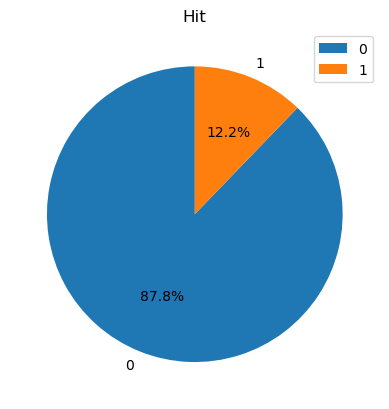

In [108]:
# Create a pie chart
Hit_count = df['Hit'].value_counts()
print(Hit_count)

labels = Hit_count.index.tolist()
sizes = Hit_count.values.tolist()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Hit')
plt.legend(labels, loc='best')

plt.show()

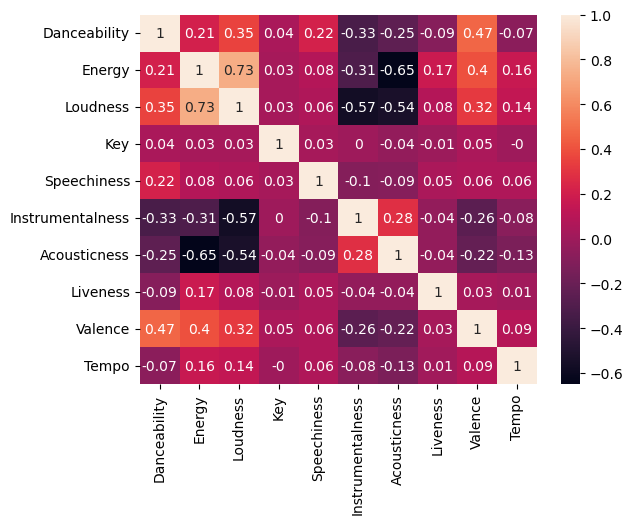

In [109]:
df_corr = df[['Danceability', 'Energy', 'Loudness', 'Key', 'Speechiness', 'Instrumentalness', 
              'Acousticness', 'Liveness', 'Valence', 'Tempo']].corr().round(2)

#Correlation matrix heatmap using seaborn
sns.heatmap(df_corr, annot=True)
plt.show()

## Modeling and Evaluation:

### DECISION TREE

In [141]:
# Define the independent variables (features) and the dependent variable (target)
X = df[['Danceability', 'Energy', 'Loudness', 'Key','Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo']]
y = df['Hit']

# Split the data into a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 33)

# Create and train the decision tree classifier

clf = DecisionTreeClassifier() #clf to denote classifier
clf.fit(X_train,y_train)

print("Classification reports on test data")

y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Classification reports on test data
[[3170  453]
 [ 344  152]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      3623
           1       0.25      0.31      0.28       496

    accuracy                           0.81      4119
   macro avg       0.58      0.59      0.58      4119
weighted avg       0.82      0.81      0.81      4119



### Regularization and 10-fold Cross Validation for Model Selection 

In [154]:
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the independent variables (features) and the dependent variable (target)
X = df[['Danceability', 'Energy', 'Loudness', 'Key', 'Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo']]
y = df['Hit']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                     train_size = 0.7, 
                                     test_size = 0.3, 
                                     random_state = 33)

# Define the range of alphas to test
alphas = [1, 2, 3, 5, 8, 10, 11, 12, 13, 15, 18, 20, 22, 25, 30, 35, 50]

# Initialize the RidgeCV model with the alpha values and cross-validation configuration
model_ridge_cv = RidgeCV(alphas=alphas, cv=10, scoring='neg_mean_squared_error')

# Fit the model with the training data
model_ridge_cv.fit(X_train, y_train)

# The best alpha value after cross-validation
best_alpha = model_ridge_cv.alpha_
print(" The best alpha value is:", best_alpha)

# Now we can train a final Ridge model using the best alpha value
model_ridge = Ridge(alpha=best_alpha)
model_ridge.fit(X_train, y_train)

# Predict on the test set using the final model
y_pred = model_ridge.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse = mean_squared_error(y_test, y_pred)
print(" Test MSE", mse)

# Model score (R^2) on the test set
test_score = model_ridge.score(X_test, y_test)
print(" Test Score", test_score)

# Extracting the model parameters (coefficients and intercept)
ridge_coefficients = model_ridge.coef_
ridge_intercept = model_ridge.intercept_

# Print out the coefficients for the optimal alpha
print("\n Coefficients for the optimal alpha:")
for feature, coef in zip(X.columns, model_ridge.coef_):
    print(f"{feature}: {coef}")

 The best alpha value is: 12
 Test MSE 0.10332828916925875
 Test Score 0.024442634701570376

 Coefficients for the optimal alpha:
Danceability: 0.10209027590632326
Energy: -0.1298601769358246
Loudness: 0.00909989749174242
Key: -0.0010806542170542293
Speechiness: -0.00813156949580995
Instrumentalness: -0.0023588053606549125
Acousticness: -0.11005070002851707
Liveness: -0.033770605464791506
Valence: -0.045645220993556314
Tempo: 0.00018460776903785278


### Lasso Regression and Feature Selection

The best alpha value for Lasso is: 0.0001
Test MSE for Lasso: 0.1032535796613739
Coefficients for the Lasso model:
Danceability: 0.13232915401448134
Energy: -0.12292194759110356
Loudness: 0.00919158662072645
Key: 9.875048331579441e-05
Speechiness: -0.0006209813296958729
Instrumentalness: 0.0038814216213925654
Acousticness: -0.11305962545518043
Liveness: -0.025054671479754573
Valence: -0.05798487577492491
Tempo: 3.668362537381213e-05
Test Score (R^2) for Lasso: 0.016577975577374615


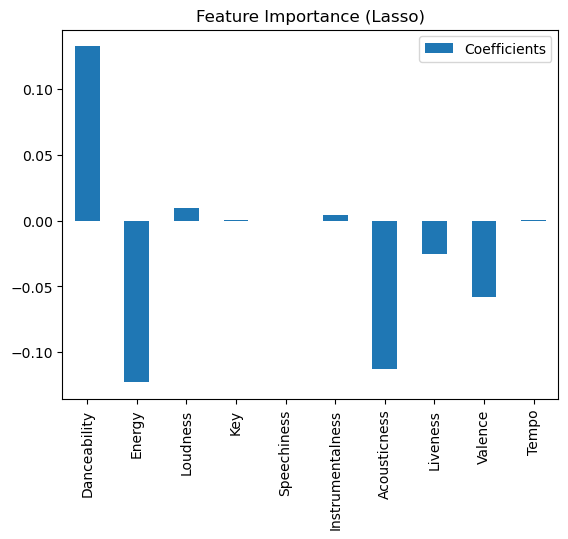

In [158]:
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Define the independent variables (features) and the dependent variable (target)
X = df[['Danceability', 'Energy', 'Loudness', 'Key', 'Speechiness', 'Instrumentalness', 'Acousticness', 'Liveness', 'Valence', 'Tempo']]
y = df['Hit']

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

# Define the range of alphas to test
alphas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]

# Initialize the LassoCV model with the alpha values and cross-validation configuration
model_lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=10)

# Fit the model with the training data
model_lasso_cv.fit(X_train, y_train)

# The best alpha value after cross-validation
best_alpha_lasso = model_lasso_cv.alpha_
print(f'The best alpha value for Lasso is: {best_alpha_lasso}')

# Now we can use this alpha value to train a Lasso model
model_lasso = Lasso(alpha=best_alpha_lasso)
model_lasso.fit(X_train, y_train)

# Predict on the test set using the Lasso model
y_pred_lasso = model_lasso.predict(X_test)

# Calculate the Mean Squared Error (MSE) on the test set
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
print(f'Test MSE for Lasso: {mse_lasso}')

# Get the model's coefficients, which indicate feature importance
print("Coefficients for the Lasso model:")
for feature, coef in zip(X.columns, model_lasso.coef_):
    print(f"{feature}: {coef}")

# Model score (R^2) on the test set
test_score_lasso = model_lasso.score(X_test, y_test)
print(f'Test Score (R^2) for Lasso: {test_score_lasso}')

# Optionally, plot the coefficients for feature importance
coefficients_lasso = pd.DataFrame(model_lasso.coef_, index=X.columns, columns=['Coefficients'])
coefficients_lasso.plot(kind='bar', title='Feature Importance (Lasso)')
plt.show()
